In [ ]:
import numpy as np
import pandas as pd


In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(os.getcwd())

/content


In [ ]:
import glob
file_list=glob.glob('/content/drive/MyDrive/XAI/dataset/*')

In [ ]:
file_list

['/content/drive/MyDrive/XAI/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv']

Load data

In [ ]:
df=pd.read_csv(file_list[0])
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print(df.columns)
df.info()
#CustomerID = Customer ID
#Gender Customer = gender (female, male)
#SeniorCitizen = Whether the customer is a senior citizen or not (1, 0)
#Partner = Whether the customer has a partner or not (Yes, No) #부부여부?
#Dependents = Whether the customer has dependents or not (Yes, No) #부양가족여부
#Tenure = Number of months the customer has stayed with the company #근속년수
#PhoneService = Whether the customer has a phone service or not (Yes, No) #폰서비스 여부
#MultipleLines = Whether the customer has multiple lines or not (Yes, No, No phone service) #여러 휴대폰?
#InternetService = Customer’s internet service provider (DSL, Fiber optic, No) #인터넷 서비스 여부
#OnlineSecurity = Whether the customer has online security or not (Yes, No, No internet service) #온라인 시큐리티 여부
#OnlineBackup = Whether the customer has online backup or not (Yes, No, No internet service) #cloud 서비스?
#DeviceProtection = Whether the customer has device protection or not (Yes, No, No internet service) #폰 보험?
#TechSupport = Whether the customer has tech support or not (Yes, No, No internet service) #테크 서포트 여부
#StreamingTV = Whether the customer has streaming TV or not (Yes, No, No internet service) #tv 스트리밍 여부
#StreamingMovies = Whether the customer has streaming movies or not (Yes, No, No internet service) #영화 스트리밍 여부
#Contract = The contract term of the customer (Month-to-month, One year, Two year) #계약 기간
#PaperlessBilling = Whether the customer has paperless billing or not (Yes, No) # online billing 여부
#PaymentMethod = The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) #결제 수단
#MonthlyCharges = The amount charged to the customer monthly #월 사용료
#TotalCharges = The total amount charged to the customer #얼마나 지불했는지
#Churn = Whether the customer churned or not (Yes or No) #고객 이탈 여부 target

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   obj

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go
import warnings

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
df.drop(columns=['customerID'],inplace=True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.shape

(7032, 20)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


Visualization

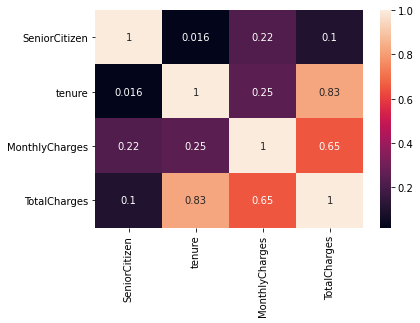

In [ ]:
sns.heatmap(df.corr(),annot=True)

(array([5163.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1869.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

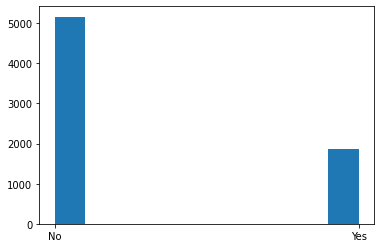

In [ ]:
plt.hist(df['Churn'])

In [ ]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

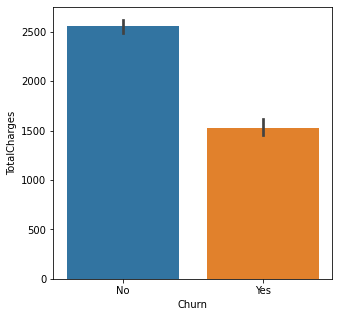

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(data=df, y="TotalCharges", x='Churn') #이탈하지 않은 사람들이 Total Charge가 비교적 큼

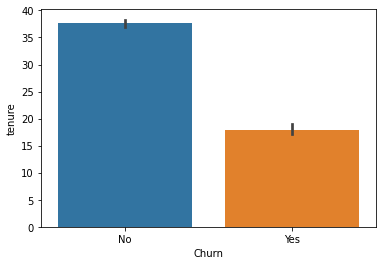

In [ ]:
sns.barplot(data=df, y="tenure", x='Churn') #근속 년수가 긴 사람일수록 이탈하지 않음

Preprocessing

In [ ]:
for i in df.columns: 
    if df[i].dtypes=='object':
        print(f'{i} : {df[i].unique()}')
        print('*********************************************')

gender : ['Female' 'Male']
*********************************************
Partner : ['Yes' 'No']
*********************************************
Dependents : ['No' 'Yes']
*********************************************
PhoneService : ['No' 'Yes']
*********************************************
MultipleLines : ['No phone service' 'No' 'Yes']
*********************************************
InternetService : ['DSL' 'Fiber optic' 'No']
*********************************************
OnlineSecurity : ['No' 'Yes' 'No internet service']
*********************************************
OnlineBackup : ['Yes' 'No' 'No internet service']
*********************************************
DeviceProtection : ['No' 'Yes' 'No internet service']
*********************************************
TechSupport : ['No' 'Yes' 'No internet service']
*********************************************
StreamingTV : ['No' 'Yes' 'No internet service']
*********************************************
StreamingMovies : ['No' 'Yes' 'No internet 

In [ ]:
#df.replace('No phone service', 'No', inplace=True) #수정 필요

In [ ]:
#df.replace('No internet service', 'No', inplace=True)

In [ ]:
for i in df.columns:
    if df[i].dtypes=='object':
        print(f'{i} : {df[i].unique()}')
        print('*******************************')

gender : ['Female' 'Male']
*******************************
Partner : ['Yes' 'No']
*******************************
Dependents : ['No' 'Yes']
*******************************
PhoneService : ['No' 'Yes']
*******************************
MultipleLines : ['No phone service' 'No' 'Yes']
*******************************
InternetService : ['DSL' 'Fiber optic' 'No']
*******************************
OnlineSecurity : ['No' 'Yes' 'No internet service']
*******************************
OnlineBackup : ['Yes' 'No' 'No internet service']
*******************************
DeviceProtection : ['No' 'Yes' 'No internet service']
*******************************
TechSupport : ['No' 'Yes' 'No internet service']
*******************************
StreamingTV : ['No' 'Yes' 'No internet service']
*******************************
StreamingMovies : ['No' 'Yes' 'No internet service']
*******************************
Contract : ['Month-to-month' 'One year' 'Two year']
*******************************
PaperlessBilling : ['Yes' 'N

In [ ]:
df['gender'].replace({'Female' : 0, 'Male' : 1}, inplace=True)

In [ ]:
df['gender'].value_counts()

1    3549
0    3483
Name: gender, dtype: int64

In [ ]:
more_than_2=[]
for i in df.columns :
    if (df[i].dtypes != 'int64') & (df[i].dtypes != 'float64') & (len(df[i].unique())>2):
        more_than_2.append(i)

df=pd.get_dummies(data=df, columns=more_than_2)

        

In [ ]:
more_than_2

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [ ]:
for i in df.columns:
    if df[i].dtypes=='object':
        print(f'{i} : {df[i].unique()}')
        print('*******************************')

Partner : ['Yes' 'No']
*******************************
Dependents : ['No' 'Yes']
*******************************
PhoneService : ['No' 'Yes']
*******************************
PaperlessBilling : ['Yes' 'No']
*******************************
Churn : ['No' 'Yes']
*******************************


In [ ]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                     object
Dependents                                  object
tenure                                       int64
PhoneService                                object
PaperlessBilling                            object
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                       object
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No                            uint8
OnlineSecurity_No internet service           uint8
OnlineSecurity_Yes                           uint8
OnlineBackup_No                

In [ ]:
objects=[]
for i in df.columns:
    if df[i].dtypes=='object':
        objects.append(i)
        

In [ ]:
for i in objects:
    df[i].replace({'Yes':1, 'No':0}, inplace=True)

In [ ]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No                            uint8
OnlineSecurity_No internet service           uint8
OnlineSecurity_Yes                           uint8
OnlineBackup_No                

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [ ]:
num=['tenure','MonthlyCharges','TotalCharges']
for i in num:
    df[i]=scaler.fit_transform(df[[i]])
    

In [ ]:
for i in num:
    print(df[i].head())

0    0.000000
1    0.464789
2    0.014085
3    0.619718
4    0.014085
Name: tenure, dtype: float64
0    0.115423
1    0.385075
2    0.354229
3    0.239303
4    0.521891
Name: MonthlyCharges, dtype: float64
0    0.001275
1    0.215867
2    0.010310
3    0.210241
4    0.015330
Name: TotalCharges, dtype: float64


In [ ]:
X=df.drop('Churn', axis=1)
y=df['Churn']

In [ ]:
print(X.shape)
print(y.shape)

(7032, 40)
(7032,)


Sampling

In [ ]:
from imblearn.over_sampling  import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
smote=SMOTE(random_state=0)
X_train_over, y_train_over=smote.fit_sample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (4922, 40) (4922,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (7228, 40) (7228,)
SMOTE 적용 후 레이블 값 분포: 
 1    3614
0    3614
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Modeling-XGBOOST

In [ ]:
import xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
pip install shap

     |████████████████████████████████| 356 kB 5.0 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491650 sha256=4ef533cf410b8d9bfa85dc770c4e80cc46a69c3e36374c935e35a0e3620d5dde
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
import shap

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

SMOTE Sampling XGB Model


In [ ]:
param_grid = {"learning_rate": [0.01, 0.05, 0.1, 0.25, 0.5, 0.75],
              "max_depth":   [2, 3, 5, 7, 10],
              "max_features":[2, 3],
              "n_estimators":[50 ,100, 150, 175, 200, 250]}

In [ ]:
xgb_grid_search = GridSearchCV(estimator=XGBClassifier(),
                                param_grid=param_grid, 
                                cv=5, verbose=2, n_jobs=-1)
xgb_grid_search.fit(X_train_over, y_train_over)
xgb_grid_search.best_params_

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 35.0min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 44.1min finished


{'learning_rate': 0.05, 'max_depth': 7, 'max_features': 2, 'n_estimators': 250}

In [ ]:
print('XGB parameters: ', xgb_grid_search.best_params_)

XGB parameters:  {'learning_rate': 0.05, 'max_depth': 7, 'max_features': 2, 'n_estimators': 250}


In [ ]:
best_xgb=xgb_grid_search.best_estimator_
model=best_xgb.fit(X_train_over, y_train_over)

In [ ]:
y_test_arr=y_test.to_numpy()

In [ ]:
X_test_arr=X_test.to_numpy()

In [ ]:
XGB_tuned = XGBClassifier(n_estimators=250,
                              learning_rate=0.05,
                              max_depth=7,
                              max_features=2,
                              random_state=42)


In [ ]:
model_1=XGB_tuned.fit(X_train_over, y_train_over)

In [ ]:
pip install dmba

     |████████████████████████████████| 11.8 MB 4.6 MB/s 


In [ ]:
from dmba import plotDecisionTree, classificationSummary, regressionSummary

no display found. Using non-interactive Agg backend


In [ ]:
# fine-tuned tree: training
classificationSummary(y_train_over, model_1.predict(X_train_over))

# fine-tuned tree: test
classificationSummary(y_test_arr, model_1.predict(X_test_arr))

Confusion Matrix (Accuracy 0.9354)

       Prediction
Actual    0    1
     0 3345  269
     1  198 3416
Confusion Matrix (Accuracy 0.7796)

       Prediction
Actual    0    1
     0 1299  250
     1  215  346


In [ ]:
# fine-tuned tree: training
classificationSummary(y_train_over, best_xgb.predict(X_train_over))

# fine-tuned tree: test
classificationSummary(y_test_arr, best_xgb.predict(X_test_arr))

Confusion Matrix (Accuracy 0.9354)

       Prediction
Actual    0    1
     0 3345  269
     1  198 3416
Confusion Matrix (Accuracy 0.7796)

       Prediction
Actual    0    1
     0 1299  250
     1  215  346


In [ ]:
from sklearn.metrics         import accuracy_score, confusion_matrix, roc_curve, auc

In [ ]:
model.pred=model.predict(X_test_arr)
accuracy = accuracy_score(y_test_arr, model.pred)
print("Accuracy :", accuracy)

Accuracy : 0.7796208530805687


In [ ]:
XGB_tuned = XGBClassifier(n_estimators=150,
                              learning_rate=0.1,
                              max_depth=7,
                              max_features=2,
                              random_state=42)
model=XGB_tuned.fit(X_train_over, y_train_over)

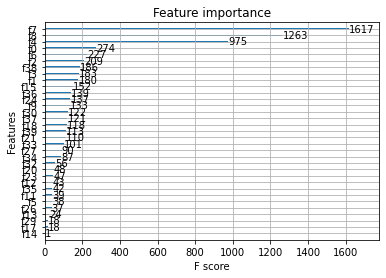

In [ ]:
xgboost.plot_importance(model)

In [ ]:
from sklearn.metrics         import accuracy_score, confusion_matrix, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix

Shap

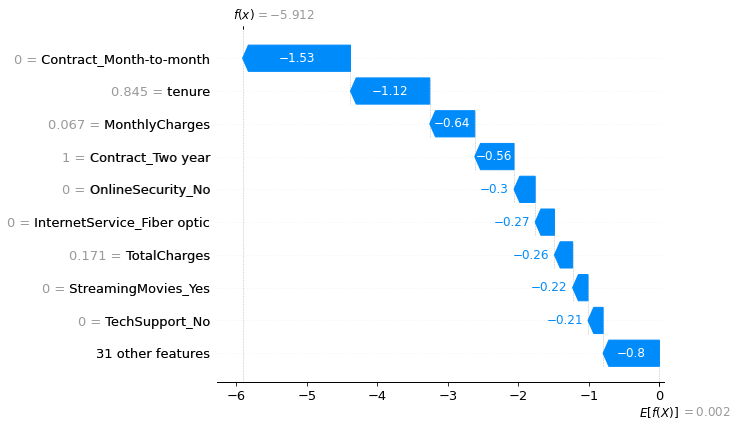

In [ ]:
explainer=shap.Explainer(model)
shapvalue=explainer(X_test)
shap.plots.waterfall(shapvalue[0])

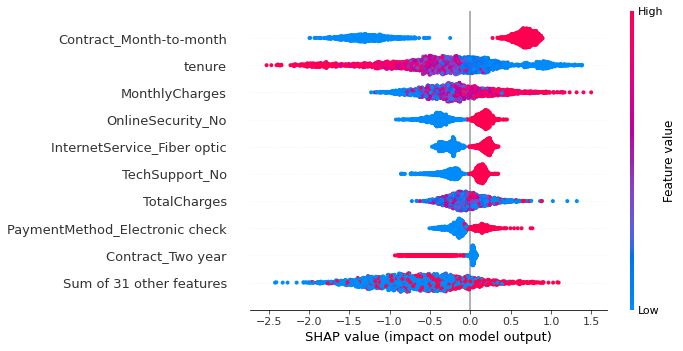

In [ ]:
# summarize the effects of all the features
shap.plots.beeswarm(shapvalue)

In [ ]:
shap.initjs()

Lime

In [ ]:
pip install lime

     |████████████████████████████████| 275 kB 5.2 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=1c343839b509c74de6db356285f1d9e44898f973ccba5015d506abf372a5c9b6
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_over, feature_names=X.columns, class_names="Churn", discretize_continuous=True)

In [ ]:
X_test_arr.shape[0]

2110

In [ ]:
i=np.random.randint(0,X_test_arr.shape[0])

In [ ]:
exp=explainer.explain_instance(X_test_arr[i],model.predict_proba,num_features=5,
                               top_labels=1)

In [ ]:
exp.show_in_notebook(show_table=True,show_all=True)

Bayesian

In [ ]:
df.columns

In [ ]:
df.rename(columns={'MultipleLines_No phone service':'MultipleLines_Nophoneservice',
                   'OnlineBackup_No internet service':'OnlineBackup_Nointernetservice',
          'InternetService_Fiber optic':'InternetService_Fiberoptic',
          'OnlineSecurity_No internet service':'OnlineSecurity_Nointernetservice',
          'DeviceProtection_No internet service':'DeviceProtection_Nointernetservice',
          'TechSupport_No internet service':'TechSupport_Nointernetservice',
          'StreamingMovies_No internet service':'StreamingMovies_Nointernetservice',
          'Contract_Month-to-month':'Contract_Month_to_month',
          'PaymentMethod_Bank transfer (automatic)':'PaymentMethod_Banktransfer_automatic',
          'PaymentMethod_Credit card (automatic)':'PaymentMethod_Creditcard_automatic',
           'PaymentMethod_Electronic check':'PaymentMethod_Electroniccheck',
           'PaymentMethod_Mailed check':'PaymentMethod_Mailedcheck',
           'Contract_One year':'Contract_Oneyear',
           'Contract_Two year':'Contract_Twoyear',
           'StreamingTV_No internet service':'StreamingTV_Nointernetservice'}, inplace=True)

In [ ]:
pip install pymc

     |████████████████████████████████| 385 kB 5.2 MB/s 
  Created wheel for pymc: filename=pymc-2.3.8-cp37-cp37m-linux_x86_64.whl size=1353183 sha256=1c6229912fbc35b69792f512208d212279db3e70e97503130ae34b50983b82ac
  Stored in directory: /root/.cache/pip/wheels/3b/9b/1d/2a2ddbe80519db2698745f0988ce50c36ad38aac886a4ee0ca
Successfully built pymc


In [ ]:
import pymc3 as pm
import seaborn
import theano.tensor as tt
import arviz as az #n-linear 클수록 r^2 가 낮을수록 dL, ML 을 통한 설명력

In [ ]:
drops=['tenure', 'MonthlyCharges', 'TotalCharges','Churn']

In [ ]:
df_category=df.drop(columns=drops)

In [ ]:
numeric=['tenure', 'MonthlyCharges','TotalCharges']

In [ ]:
lower=-10**6
higher=10**6

In [ ]:
with pm.Model() as first_model:
    #prioir on parameters
    p1=pm.Uniform('p1',lower=0, upper=1)
    Beta_0=pm.Uniform('Beta_0',lower, higher)
    for i in df_category.columns:
        globals()['Beta_{}'.format(i)]= pm.Bernoulli(i, p1, observed=df_category[i])
    for j in numeric:
        globals()['Beta_{}'.format(j)]=pm.Uniform(j,0,1)

    prob=pm.Deterministic('p',
                    pm.math.sigmoid(Beta_0+Beta_Contract_Month_to_month*df['Contract_Month_to_month']
                                      +Beta_Contract_Oneyear*df['Contract_Oneyear']+Beta_Contract_Twoyear*df['Contract_Twoyear']
                                      +Beta_Dependents*df['Dependents']+Beta_DeviceProtection_No*df['DeviceProtection_No']+
                                      Beta_DeviceProtection_Nointernetservice*df['DeviceProtection_Nointernetservice']+Beta_DeviceProtection_Yes*df['DeviceProtection_Yes']
                                      +Beta_gender*df['gender']+Beta_InternetService_DSL*df['InternetService_DSL']
                                      +Beta_InternetService_Fiberoptic*df['InternetService_Fiberoptic']+Beta_InternetService_No*df['InternetService_No']
                                      +Beta_MonthlyCharges*df['MonthlyCharges']+Beta_MultipleLines_No*df['MultipleLines_No']
                                      +Beta_MultipleLines_Nophoneservice*df['MultipleLines_Nophoneservice']+
                                        Beta_MultipleLines_Yes*df['MultipleLines_Yes']+Beta_OnlineBackup_No*df['OnlineBackup_No']
                                      +Beta_OnlineBackup_Nointernetservice*df['OnlineBackup_Nointernetservice']+Beta_OnlineBackup_Yes*df['OnlineBackup_Yes']
                                      +Beta_OnlineSecurity_No*df['OnlineSecurity_No']+Beta_OnlineSecurity_Nointernetservice*df['OnlineSecurity_Nointernetservice']
                                      +Beta_PaperlessBilling*df['PaperlessBilling']+Beta_Partner*df['Partner']
                                      +Beta_PaymentMethod_Banktransfer_automatic*df['PaymentMethod_Banktransfer_automatic']
                                      +Beta_PaymentMethod_Creditcard_automatic*df['PaymentMethod_Creditcard_automatic']
                                      +Beta_PaymentMethod_Electroniccheck*df['PaymentMethod_Electroniccheck']
                                      +Beta_PaymentMethod_Mailedcheck*df['PaymentMethod_Mailedcheck']
                                      +Beta_PhoneService*df['PhoneService']
                                      +Beta_SeniorCitizen*df['SeniorCitizen']
                                      +Beta_StreamingMovies_No*df['StreamingMovies_No']
                                      +Beta_StreamingMovies_Nointernetservice*df['StreamingMovies_Nointernetservice']
                                      +Beta_StreamingMovies_Yes*df['StreamingMovies_Yes']
                                      +Beta_StreamingTV_No*df['StreamingTV_No']
                                      +Beta_StreamingTV_Nointernetservice*df['StreamingTV_Nointernetservice']
                                      +Beta_TechSupport_No*df['TechSupport_No']
                                      +Beta_TechSupport_Nointernetservice*df['TechSupport_Nointernetservice']
                                      +Beta_TechSupport_Yes*df['TechSupport_Yes']
                                      +Beta_tenure*df['tenure']
                                      +Beta_TotalCharges*df['TotalCharges']))
       
   

In [ ]:
import pymc

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [ ]:
with first_model:
    observed=pm.Bernoulli("bernoulli_obs4", p=prob, observed=df['Churn'])
    model=pm.Model(observed)
    
    map=pymc.MAP(model)
    map.fit()
    mcmc=pymc.MCMC(model)
    mcmc.sample(120000,100000,2)

divide by zero encountered in log
invalid value encountered in double_scalars


 [-----------------100%-----------------] 120000 of 120000 complete in 0.5 sec